In [1]:
#Układy stabilne i minimalnofazowe

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
poles_figsize  =(8, 8)
default_figsize=(14, 8)

B=[1, 2, 1] bieguny=[-1. -1.]
stabilny

B=[1, 0, 2] bieguny=[-0.+1.41421356j  0.-1.41421356j]
niestabilny

B=[1, 0, 2] bieguny=[-0.+1.41421356j  0.-1.41421356j]
niestabilny

B=[1, 1] bieguny=[-1.]
stabilny

B=[1, 1] bieguny=[-1.]
stabilny

B=[1, 4, 4] bieguny=[-2. -2.]
stabilny

B=[1, -2, 4, 1] bieguny=[ 1.11124726+1.80544243j  1.11124726-1.80544243j -0.22249451+0.j        ]
niestabilny

B=[1, 3, 1] bieguny=[-2.61803399 -0.38196601]
stabilny

B=[1, 8, 15] bieguny=[-5. -3.]
stabilny

B=[1, 6, -7] bieguny=[-7.  1.]
stabilny

B=[1, 1] bieguny=[-1.]
stabilny

B=[1, -1] bieguny=[1.]
niestabilny

B=[1, 2] bieguny=[-2.]
stabilny

B=[1, 2] bieguny=[-2.]
stabilny



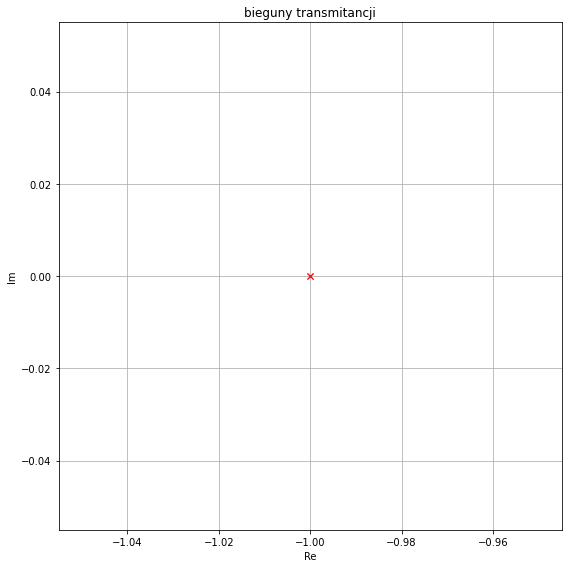

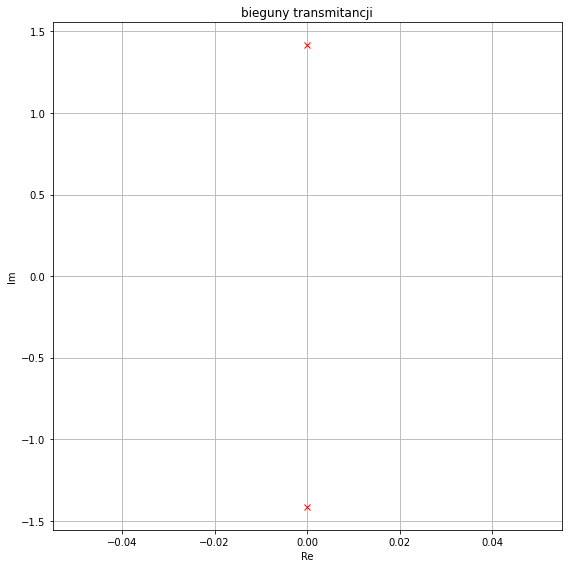

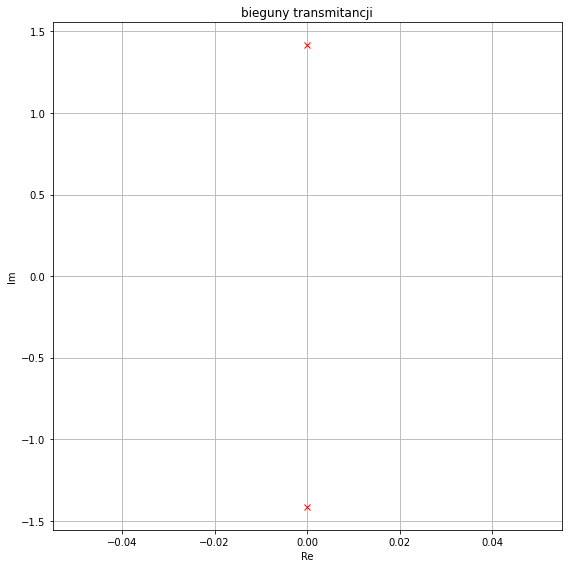

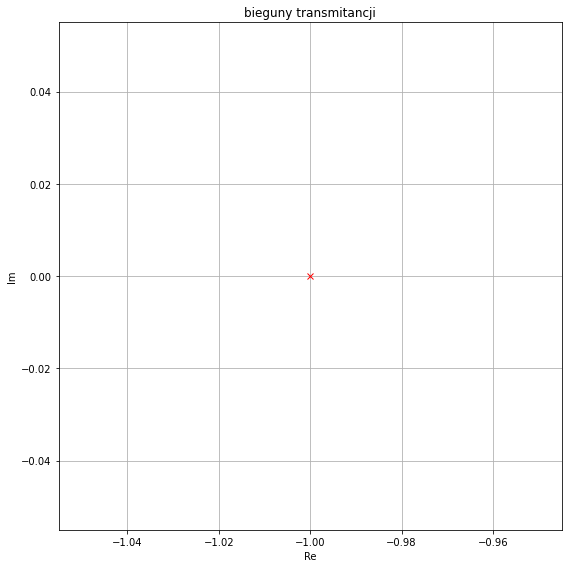

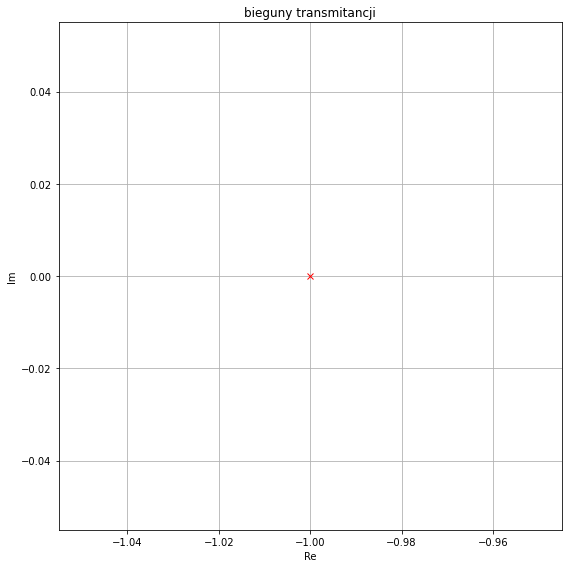

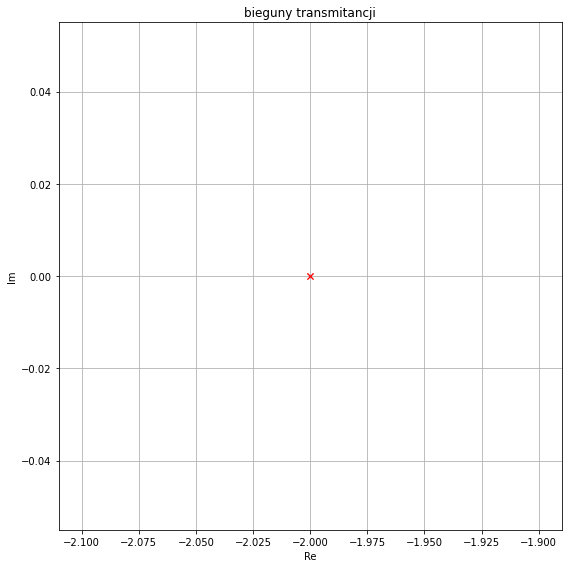

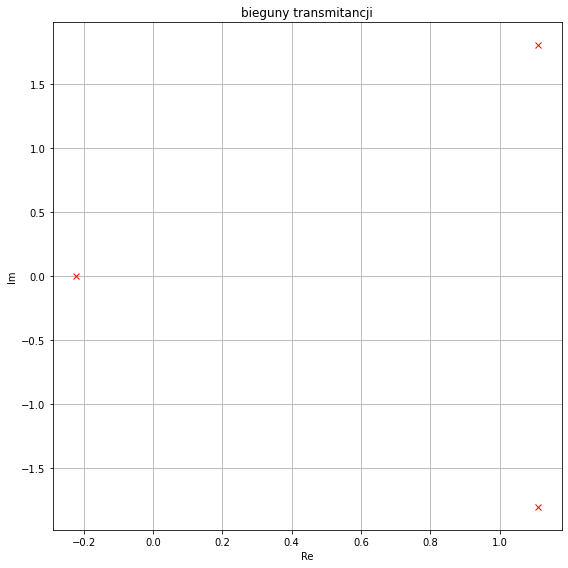

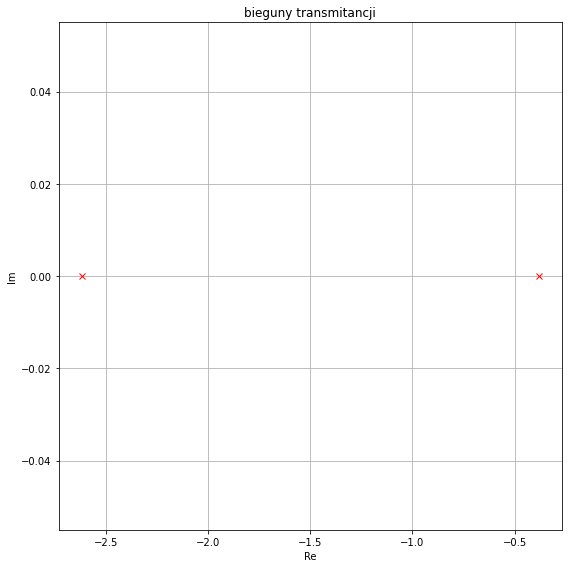

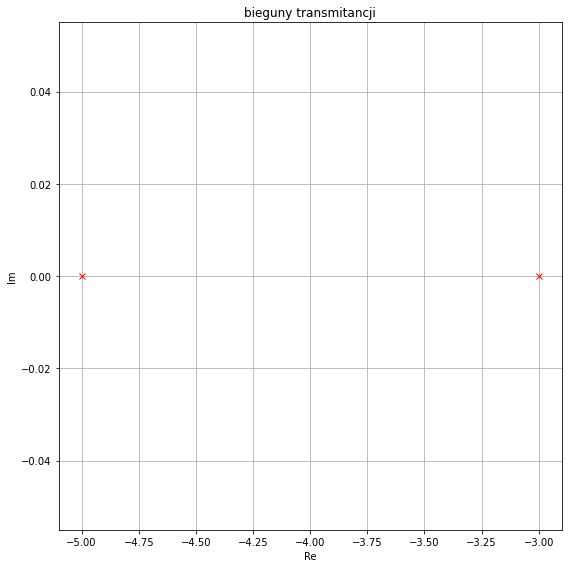

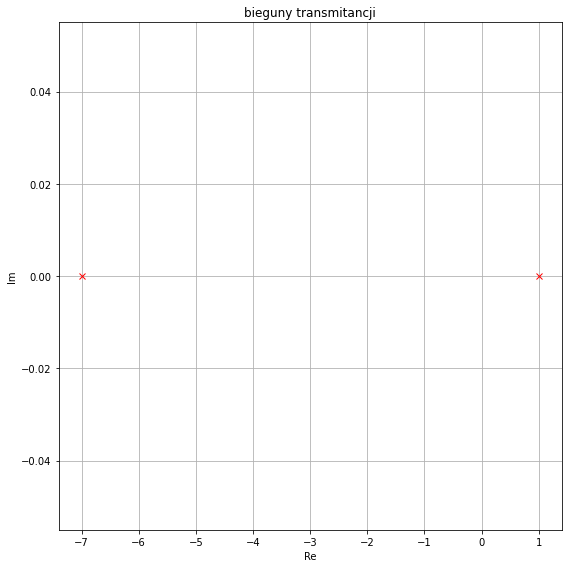

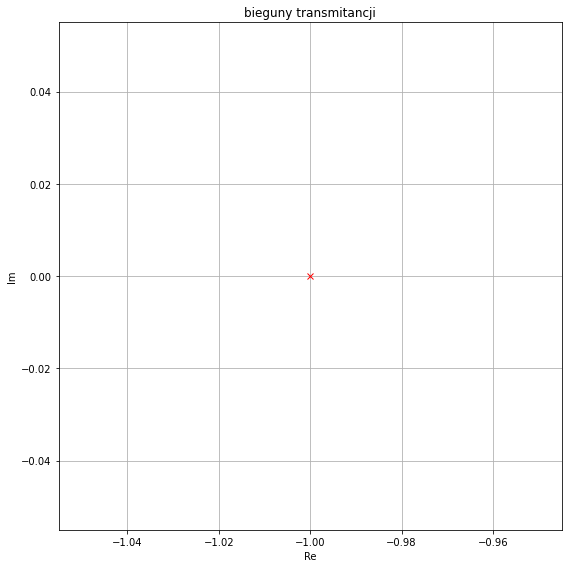

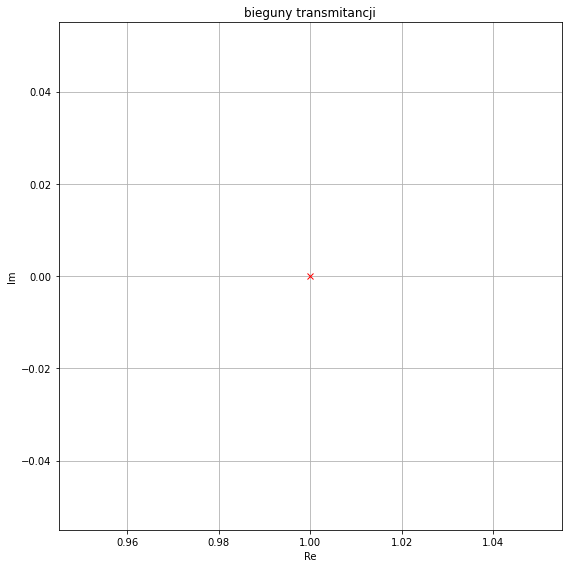

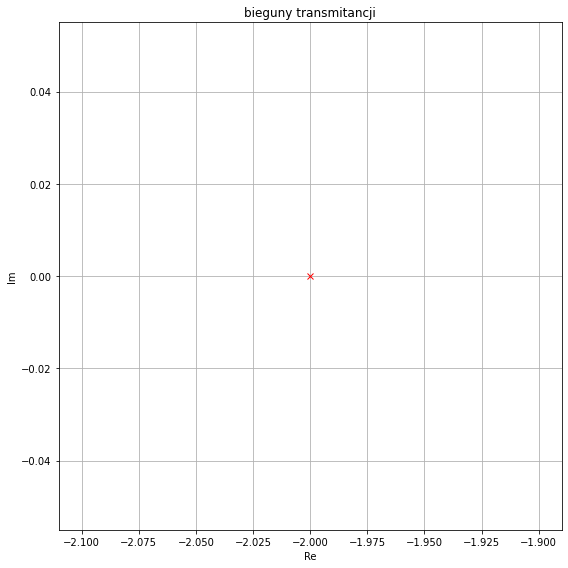

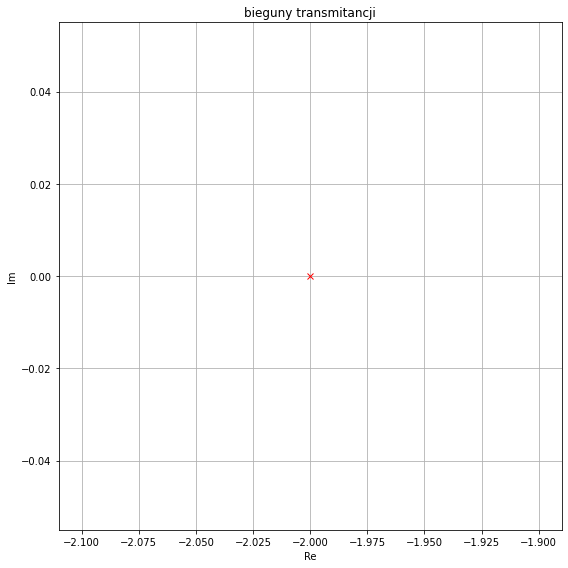

In [4]:
#Zbadaj stabilność w sensie BIBO

#define list of denominators
denominators = [ [1,2,1],
                 [1,0,2],
                 [1,0,2],
                 [1,1],
                 [1,1],
                 [1,4,4], 
                 [1,-2,4,1],
                 [1,3,1],
                 [1,8,15],
                 [1,6,-7],
                 [1,1],
                 [1,-1],
                 [1,2],
                 [1,2] ]


C=1
L=1
R=1

#for each denominator from list - calculate roots

for A in denominators:
    polynom = np.poly1d(A)
    poles = np.roots(polynom)
    print("B={} bieguny={}".format(A, poles))
    

    for B in poles:
        if B.real >= 0:
            print ('niestabilny')
            print()
            break
        else:
            print('stabilny')
            print()
            break

    fig, ax = plt.subplots(1, 1, figsize=poles_figsize)
    ax.plot(poles.real, poles.imag,'rx')
    ax.set_title("bieguny transmitancji")
    ax.set_xlabel("Re")
    ax.set_ylabel("Im")
    ax.grid()
    fig.tight_layout()
    fig.show()

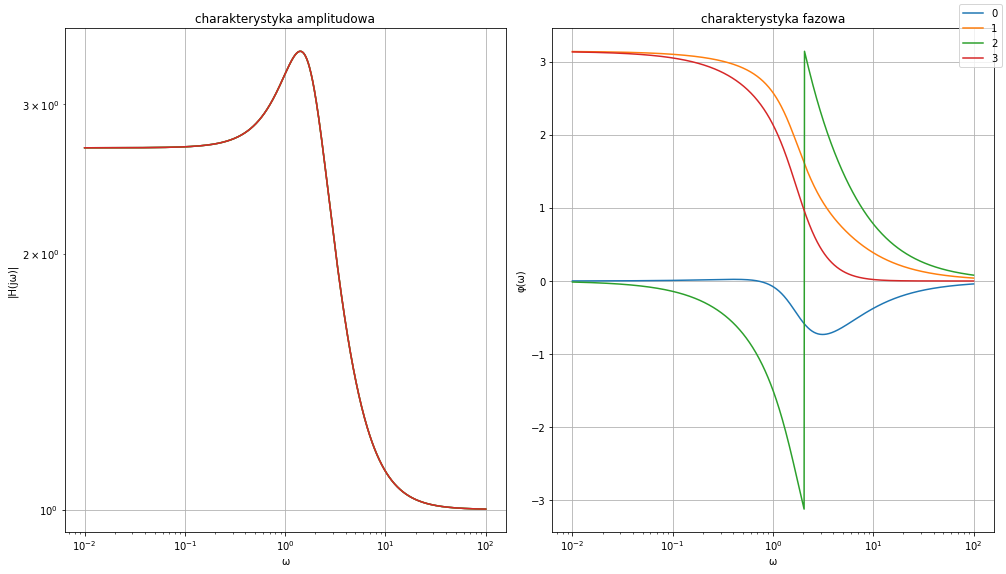

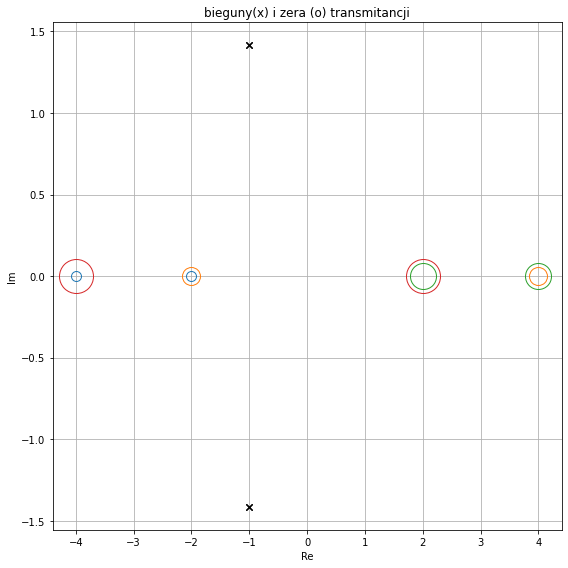

In [6]:
#Sprawdź właściwości systemów

#define list of numerators
numerators = [[1, 6, 8],
              [1,-2,-8],
              [1,-6, 8],
              [1, 2,-8]
]
#define denominator
denominator = [1, 2, 3]
w = np.logspace(-2, 2, 1000)
s = w * 1j

figMP, axsMP = plt.subplots(1, 2, figsize=default_figsize)
figZP, axZP  = plt.subplots(1, 1, figsize=poles_figsize  )

for idx, numerator in enumerate(numerators):
    #charakterystyka amplitudowa
    #charakterystyka fazowa
    B = np.poly1d(numerator)
    A = np.poly1d(denominator)


    H = B(s)/A(s)
    M = np.abs(H)
    P = np.angle(H)
    axsMP[0].loglog(w,M,label=str(idx))
    axsMP[1].semilogx(w,P)

    #zera transmitancji
    polesB=np.roots(B)

    #bieguny transmitancji
    polesA=np.roots(A)


    axZP.plot(polesB.real, polesB.imag, 'o', markerfacecolor= 'none',markersize=10+8*idx)
    axZP.plot(polesA.real, polesA.imag, 'xk')


axsMP[0].set_title("charakterystyka amplitudowa")
axsMP[0].set_xlabel("ω")
axsMP[0].set_ylabel("|H(jω)|")
axsMP[0].grid()
axsMP[1].set_title("charakterystyka fazowa")
axsMP[1].set_xlabel("ω")
axsMP[1].set_ylabel("φ(ω)")
axsMP[1].grid()
figMP.legend()
figMP.tight_layout()
figMP.show()

axZP.set_title("bieguny(x) i zera (o) transmitancji")
axZP.set_xlabel("Re")
axZP.set_ylabel("Im") 
axZP.grid()
figZP.tight_layout()
figZP.show()